# Optimization of marketing expenses for Yandex.Afisha

In the analytical department at Yandex.Afisha have task to optimization of marketing expenses of Yandex.Afisha.
I need to find:

   - How people use the product
   - When they start to buy
   - How much money each customer brings
   - When they pay off

### Table of contents
[Step 1. Open the data file and study the general information](#Step-1.-Open-the-data-file-and-study-the-information.)
- [Conclusion Step 1](#Conclusion-Step-1)

[Step 2. Prepare the data for analysis](#Step-2.-Prepare-the-data-for-analysis)
- [Conclusion Step 2](#Conclusion-Step-2)

[Step 3. Make reports and calculate metrics for product](#Step-3.-Make-reports-and-calculate-metrics-for-product)
- [How many people use it every day, week, and month?](#How-many-people-use-it-every-day,-week,-and-month?)
- [How many sessions are there per day?](#How-many-sessions-are-there-per-day?-(One-user-might-have-more-than-one-session.))
- [What is the length of each session?](#What-is-the-length-of-each-session?)
- [How often do users come back?](#How-often-do-users-come-back?)
- [Conclusion Step 3](#Conclusion-Step-3)

[Step 4. Make reports and calculate metrics for sales](#Step-4.-Make-reports-and-calculate-metrics-for-sales)
- [When do people start buying?](#When-do-people-start-buying?)
- [How many orders do they make during a given period of time?](#How-many-orders-do-they-make-during-a-given-period-of-time?)
- [What is the average purchase size?](#What-is-the-average-purchase-size?)
- [How much money do they bring? (LTV)](#How-much-money-do-they-bring?-(LTV))
- [Conclusion Step 4](#Conclusion-Step-4)

[Step 5. Make reports and calculate metrics for marketing](#Step-5.-Make-reports-and-calculate-metrics-for-marketing)
- [How much money was spent? Overall/per source/over time](#How-much-money-was-spent?-Overall/per-source/over-time)
- [How much did customer acquisition from each of the sources cost?](#How-much-did-customer-acquisition-from-each-of-the-sources-cost?)
- [How worthwhile where the investments? (ROI)](#How-worthwhile-where-the-investments?-(ROI))
- [Conclusion Step 5](#Conclusion-Step-5)

[Overall conclusion](#Overall-conclusion)

## Step 1. Open the data file and study the general information.

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='white', palette='Set2')

In [46]:
visits = pd.read_csv('visits_log_us.csv',
                     dtype={'Device': 'category'},
                     parse_dates=['Start Ts', 'End Ts'])
visits.info(memory_usage='deep')
visits.rename(str.lower, axis=1, inplace=True)
visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id',
                       'start ts': 'start_ts'}, inplace=True)
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [47]:
orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
orders.info(memory_usage='deep')
orders.rename(str.lower, axis=1, inplace=True)
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [48]:
costs=pd.read_csv('costs_us.csv',
                  dtype={'source_id': 'category'},
                  parse_dates=['dt'])
costs.info(memory_usage='deep')
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 43.0 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


### Conclusion Step 1

Changed data types to use less memory. Renamed columns to names without spaces.

## Step 2. Prepare the data for analysis

Adding session by year, month(only number of month and firs day of month), week, date. Finding first activity date. 

In [49]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
first_activity_date = visits.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')
visits['session_date'] = pd.to_datetime(visits['session_date'])
visits['first_activity_date'] = pd.to_datetime(visits['first_activity_date'])
visits['session_all_month'] = visits['start_ts'].astype('datetime64[M]')
visits.info()
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   device               359400 non-null  category      
 1   end_ts               359400 non-null  datetime64[ns]
 2   source_id            359400 non-null  int64         
 3   start_ts             359400 non-null  datetime64[ns]
 4   uid                  359400 non-null  uint64        
 5   session_year         359400 non-null  int64         
 6   session_month        359400 non-null  int64         
 7   session_week         359400 non-null  int64         
 8   session_date         359400 non-null  datetime64[ns]
 9   first_activity_date  359400 non-null  datetime64[ns]
 10  session_all_month    359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), int64(4), uint64(1)
memory usage: 27.8 MB


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,first_activity_date,session_all_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-03-09,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-27,2017-12-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,2017-09-03,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,2017-06-29,2018-01-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05,2017-11-05,2017-11-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,7,29,2017-07-19,2017-07-19,2017-07-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,11,45,2017-11-08,2017-11-08,2017-11-01


Adding order date anf finding first order date.

In [50]:
orders['order_date'] = orders['buy_ts'].dt.date
first_order_date = orders.groupby(['uid'])['order_date'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['first_order_date'] = pd.to_datetime(orders['first_order_date'])
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy_ts            50415 non-null  datetime64[ns]
 1   revenue           50415 non-null  float64       
 2   uid               50415 non-null  uint64        
 3   order_date        50415 non-null  datetime64[ns]
 4   first_order_date  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 1.9 MB


,buy_ts,revenue,uid,order_date,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01,2017-06-01


Adding costs month

In [51]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs.head(10)

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
5,1,2017-06-06,40.39,2017-06-01
6,1,2017-06-07,40.59,2017-06-01
7,1,2017-06-08,56.63,2017-06-01
8,1,2017-06-09,40.16,2017-06-01
9,1,2017-06-10,43.24,2017-06-01


### Conclusion Step 2

Added columns for future calculations. Changed from type to needed.

## Step 3. Make reports and calculate metrics for product

#### How many people use it every day, week, and month?

In [52]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'})
wau_total = visits.groupby(
    ['session_year', 'session_week']).agg({'uid': 'nunique'})
mau_total = visits.groupby(['session_all_month']).agg({'uid': 'nunique'})
print('Daily Active Users:', int(dau_total.mean()))
print('Weekly Active Users:', int(wau_total.mean()))
print('Monthly Active Users:', int(mau_total.mean()))

Daily Active Users: 907
Weekly Active Users: 5716
Monthly Active Users: 23228


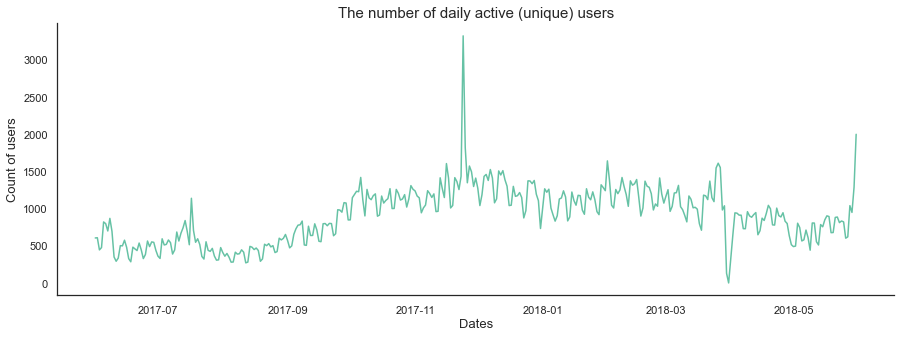

In [53]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='session_date', y='uid', data=dau_total.reset_index())
sns.despine()
plt.xlabel('Dates', size=13)
plt.ylabel('Count of users', size=13)
plt.title('The number of daily active (unique) users', size=15);

Best day for activity was 24 november 2017. It was friday and 3319 unique session. Worst day is 31 march 2018. Only 1 unique session. What was in this day? Server is down?

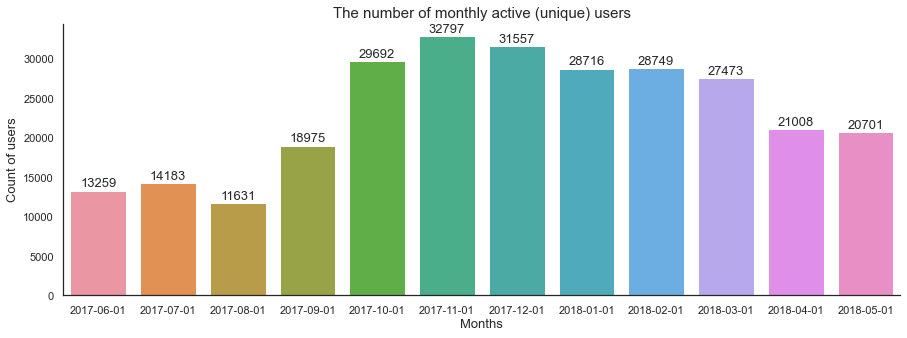

In [54]:
plt.figure(figsize=(15, 5))
bar = sns.barplot(x='session_all_month', y='uid', data=mau_total.reset_index())
bar.set_xticklabels(labels=mau_total.reset_index(
).session_all_month.dt.strftime('%Y-%m-%d'))
sns.despine()
plt.xlabel('Months', size=13)
plt.ylabel('Count of users', size=13)
plt.title('The number of monthly active (unique) users', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

By winter, the number of unique sessions has increased. Best month is november with 32797 session. After November, the figures decrease slightly.

In [55]:
sticky_wau = (dau_total.mean()/wau_total.mean()) * 100
print(f'Sticky factor by weeks {round(sticky_wau[0], 2)}')

Sticky factor by weeks 15.88


In [56]:
sticky_mau = (dau_total.mean()/mau_total.uid.mean()) * 100
print(f'Sticky factor by months {round(sticky_mau[0], 2)}')

Sticky factor by months 3.91


#### Conclusion

The number of sessions grows towards winter and then decreases slightly. The best month is November with a record day by session. Sticky factor per week 15.9 and oer month 3.9. Users not so love Yandex.Afisha?

#### How many sessions are there per day? (One user might have more than one session.)

In [57]:
sessions_day_total = visits.groupby('session_date').agg({'uid': 'count'})
sessions_day_total.rename(columns={'uid': 'Sessions per day'}, inplace=True)
sessions_day_total = sessions_day_total.join(dau_total, on='session_date').reset_index()
sessions_day_total.rename(columns={'uid': 'Daily Active Users'}, inplace=True)
sessions_day_total

,session_date,Sessions per day,Daily Active Users
0,2017-06-01,664,605
1,2017-06-02,658,608
2,2017-06-03,477,445
3,2017-06-04,510,476
4,2017-06-05,893,820
...,...,...,...
359,2018-05-27,672,620
360,2018-05-28,1156,1039
361,2018-05-29,1035,948
362,2018-05-30,1410,1289


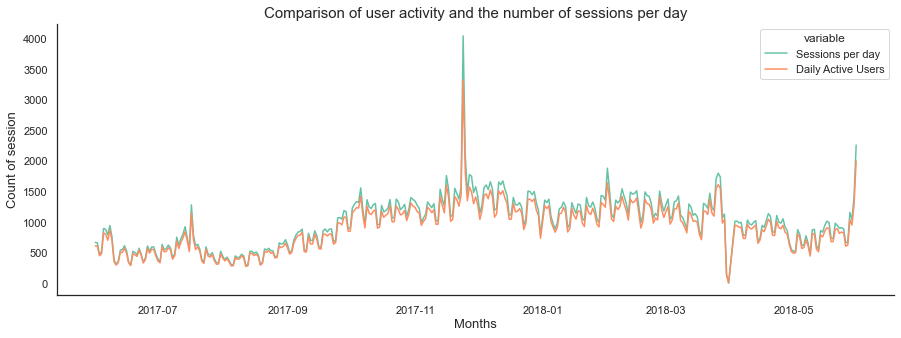

In [58]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='session_date',
             y='value',
             hue='variable',
             data=sessions_day_total.melt(id_vars='session_date',
                                          value_vars=['Sessions per day', 'Daily Active Users']))
sns.despine()
plt.xlabel('Months', size=13)
plt.ylabel('Count of session', size=13)
plt.title('Comparison of user activity and the number of sessions per day', size=15);

#### Conclusion

The total number of sessions per day is slightly more than the unique sessions. But what happened on March 31, 2018?

#### What is the length of each session?

In [59]:
visits['length_session'] = visits.end_ts-visits.start_ts
visits['length_session']

0        0 days 00:18:00
1        0 days 00:28:00
2        0 days 00:00:00
3        0 days 00:24:00
4        0 days 00:00:00
               ...      
359395   0 days 00:00:19
359396   0 days 00:00:19
359397   0 days 00:00:19
359398   0 days 00:00:19
359399   0 days 00:00:19
Name: length_session, Length: 359400, dtype: timedelta64[ns]

In [60]:
visits['length_session'].mode()

0   0 days 00:01:00
dtype: timedelta64[ns]

Most often, a 1 minute session

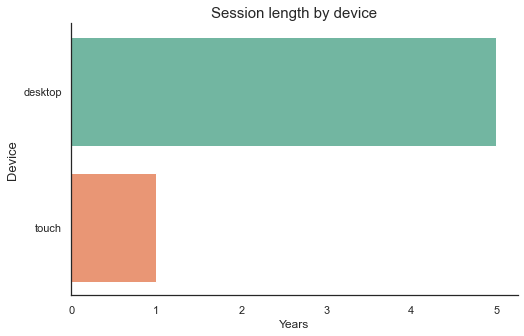

In [61]:
length_session = visits[['device', 'length_session']
                        ].groupby(['device']).sum().reset_index()
length_session['length_session'] = length_session['length_session'].astype(
    'timedelta64[Y]')
plt.figure(figsize=(8, 5))
splot = sns.barplot(data=length_session, x='length_session', y='device')
sns.despine()
plt.xlabel('Years', size=12)
plt.ylabel('Device', size=13)
plt.title('Session length by device', size=15);

For one year user spent about 5 years from desktop devices and 1 from touch.

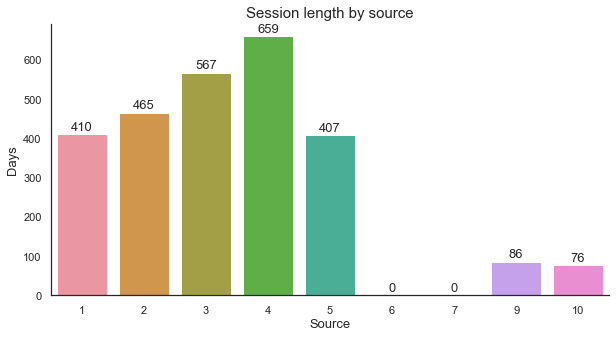

In [62]:
length_session = visits[['length_session', 'source_id']
                        ].groupby(['source_id']).sum().reset_index()
length_session['length_session'] = length_session['length_session'].astype(
    'timedelta64[D]')
plt.figure(figsize=(10, 5))
bar = sns.barplot(x='source_id', y='length_session', data=length_session)
sns.despine()
plt.xlabel('Source', size=13)
plt.ylabel('Days', size=13)
plt.title('Session length by source', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

#### Conclusion

About 10 minuts users spent on Yandex.Afisha. They do it more often from the desktop and from source number 4. What wrong with source 6,7,8?

#### How often do users come back?

In [63]:
come_back = visits[['uid',
                    'session_date',
                    'session_week',
                    'first_activity_date',
                    'session_all_month']]
come_back['first_activity_month'] = come_back['first_activity_date'].astype(
    'datetime64[M]')
come_back['cohort_lifetime'] = come_back['session_all_month'] - \
    come_back['first_activity_month']
come_back['cohort_lifetime'] = come_back['cohort_lifetime'] / \
    np.timedelta64(1, 'M')
come_back['cohort_lifetime'] = come_back['cohort_lifetime'].round().astype(int)

cohorts = come_back.groupby(['first_activity_month',
                             'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month',
                                                                'uid']]
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'})

cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = (cohorts['uid']/cohorts['cohort_users'])

retention_pivot = cohorts.pivot_table(index='first_activity_month',
                                      columns='cohort_lifetime',
                                      values='retention', aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


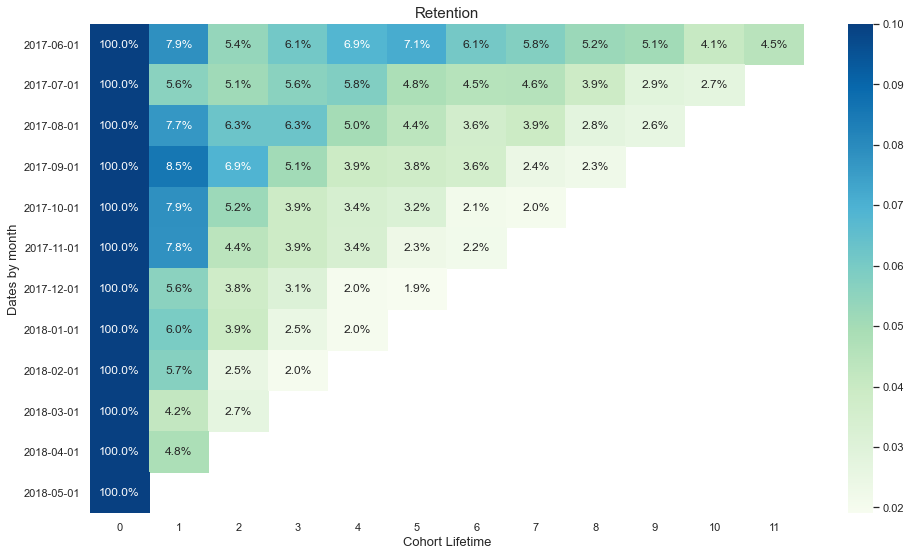

In [64]:
sns.set_context(font_scale=3)
plt.figure(figsize=(16, 9))

sns.heatmap(retention_pivot,
            vmax=0.1,
            cmap="GnBu",
            annot=True,
            fmt='.1%',
            yticklabels=retention_pivot.index.date)

plt.xlabel("Cohort Lifetime", size=13)
plt.ylabel("Dates by month", size=13)
plt.title("Retention", size=15)
plt.show()

The July cohort is the most loyal. But loyalty is still decreasing every month

### Conclusion Step 3

In winter, users spent more time on the site. Desktop is used more often. Best of all, users come from 4 sources. Loyalty is decreasing every month, but not quickly.
There was some kind of problem on 31 March 2018 and sources 6-10 show very low numbers.

## Step 4. Make reports and calculate metrics for sales

#### When do people start buying?

In [65]:
conversion = visits[['uid', 'first_activity_date', 'source_id', 'device']]
conversion = conversion.merge(orders[['uid', 'first_order_date']], on='uid')
conversion['day_for_order'] = conversion.first_order_date - \
    conversion.first_activity_date

In [66]:
conversion_grouped = conversion.groupby(
    'day_for_order').agg({'uid': 'nunique'}).reset_index()
conversion_grouped.rename(columns={'uid': 'Count of users'}, inplace=True)
conversion_grouped['day_for_order'] = conversion_grouped['day_for_order'].astype(
    str)

In [67]:
conversion_grouped.day_for_order

0        0 days
1        1 days
2        2 days
3        3 days
4        4 days
         ...   
344    355 days
345    356 days
346    357 days
347    358 days
348    363 days
Name: day_for_order, Length: 349, dtype: object

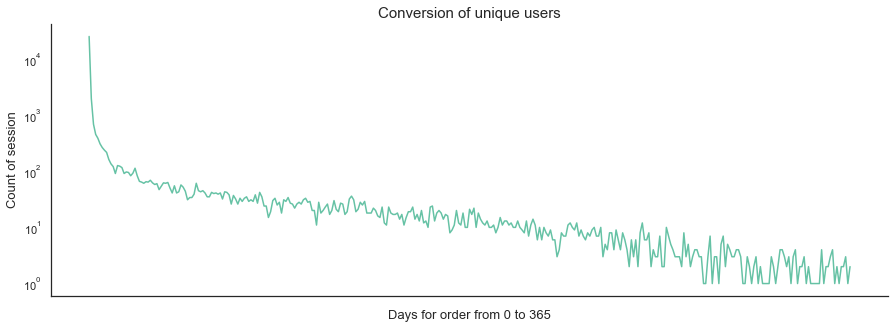

In [68]:
plt.figure(figsize=(15, 5))
line = sns.lineplot(x='day_for_order', y='Count of users',
                    data=conversion_grouped)
line.set_xticklabels(labels='', rotation=45)
line.set(yscale='log')
sns.despine()
plt.xlabel('Days for order from 0 to 365', size=13)
plt.ylabel('Count of session', size=13)
plt.title('Conversion of unique users', size=15);

Basically (25039 thousand users) make a purchase on the first day. Further, the number drops sharply.

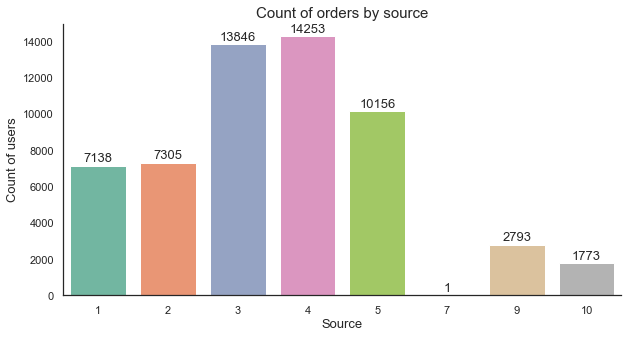

In [69]:
conversion_grouped = conversion.groupby('source_id').agg({'uid': 'nunique'})
plt.figure(figsize=(10, 5))
bar = sns.barplot(x=conversion_grouped.index, y=conversion_grouped.uid)
sns.despine()
plt.xlabel('Source', size=13)
plt.ylabel('Count of users', size=13)
plt.title('Count of orders by source', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

From 3 and 4 sources, people buy more. We also have problems with sources from 6 to 10.

#### How many orders do they make during a given period of time?

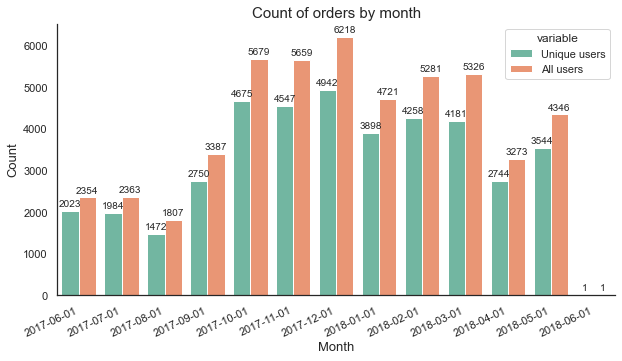

In [91]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')
fig = orders.groupby('order_month').agg(
    {'uid': 'nunique', 'order_date': 'count'}).reset_index()
fig.rename(columns={"uid": "Unique users",
                    "order_date": "All users"}, inplace=True)
fig = fig.melt(id_vars='order_month', value_vars=['Unique users', "All users"])
fig['order_month'] = fig.order_month.dt.strftime('%Y-%m-%d')
plt.figure(figsize=(10, 5))
bar = sns.barplot(x='order_month', y='value', hue='variable', data=fig)
bar.set_xticklabels(labels=fig.order_month[:13], rotation=25, ha='right')
sns.despine()
plt.xlabel('Month', size=13)
plt.ylabel('Count', size=13)
plt.title('Count of orders by month', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=10,
                 xytext=(0, 7),
                 textcoords='offset points')

Most orders are in winter and early spring. Outdoor weather may affect. Many users make more than one order per month.

#### What is the average purchase size?

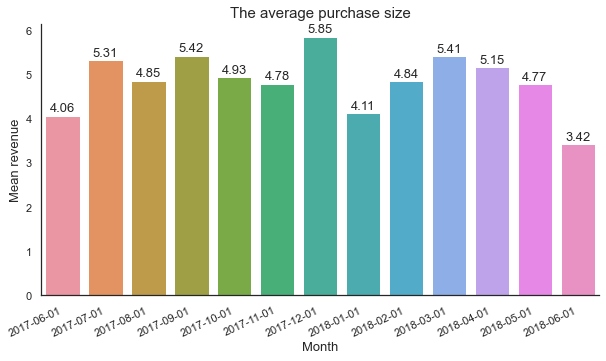

In [71]:
fig = orders.groupby('order_month').agg({'revenue': 'mean'}).reset_index()
fig['revenue'] = round(fig['revenue'], 2)
plt.figure(figsize=(10, 5))
bar = sns.barplot(x='order_month', y='revenue', data=fig)
bar.set_xticklabels(labels=fig.order_month.dt.strftime(
    '%Y-%m-%d'), rotation=25, ha='right')
sns.despine()
plt.xlabel('Month', size=13)
plt.ylabel('Mean revenue', size=13)
plt.title('The average purchase size', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

The average purchase size is about 5. The highest average buy in December was 5.85. What happened in January? People got tired of celebrating and stayed at home?

#### How much money do they bring? (LTV)

In [72]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'})
first_orders.columns = ['first_order_month']

report = orders[['uid', 'order_month', 'revenue']]
report = report.join(first_orders, on='uid')

n_user = report.groupby('first_order_month').agg({'uid': 'nunique'})
n_user.rename(columns={'uid': 'n_buyers'}, inplace=True)

report = report.join(n_user, on='first_order_month')
report['gp'] = report['revenue'] * .5
report['age'] = (report['order_month'] -
                 report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='sum').round(2)

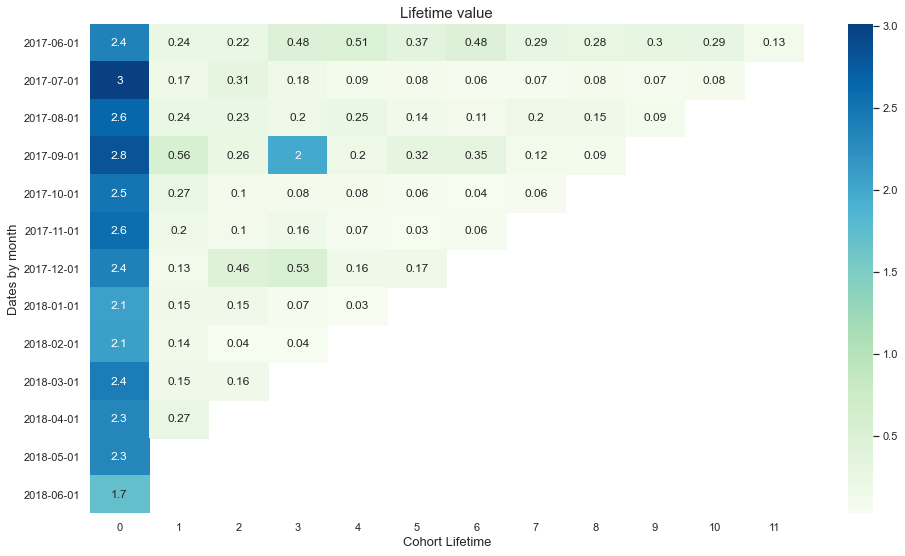

In [73]:
plt.figure(figsize=(16, 9))

sns.heatmap(result,
            cmap="GnBu",
            annot=True,
            yticklabels=result.index.date)

plt.xlabel("Cohort Lifetime", size=13)
plt.ylabel("Dates by month", size=13)
plt.title("Lifetime value", size=15)
plt.show()

In [74]:
ltv_201706 = result.loc['2017-06-01'].sum().round(2)
print(
    f'On average, each customer from the first cohort brought ${ltv_201706} in revenue over their year liftetime.')

On average, each customer from the first cohort brought $5.95 in revenue over their year liftetime.


In [75]:
last_session = visits.groupby(['uid']).agg({'start_ts': 'max'})
last_session = last_session.merge(
    visits[['uid', 'start_ts', 'source_id']], on=['uid', 'start_ts'])
# I took the source from the last session, as if the order was made from here.

economics = orders[['uid', 'revenue']]
economics = economics.merge(last_session[['uid', 'source_id']], on='uid')

n_user = economics.groupby('source_id').agg({'uid': 'nunique'})
n_user.rename(columns={'uid': 'n_buyers'}, inplace=True)

economics = economics.groupby('source_id').agg(
    {'revenue': 'sum'}).reset_index()
economics = economics.merge(n_user, on='source_id')
economics['ltv'] = round(economics.revenue / economics.n_buyers, 2)
# economics

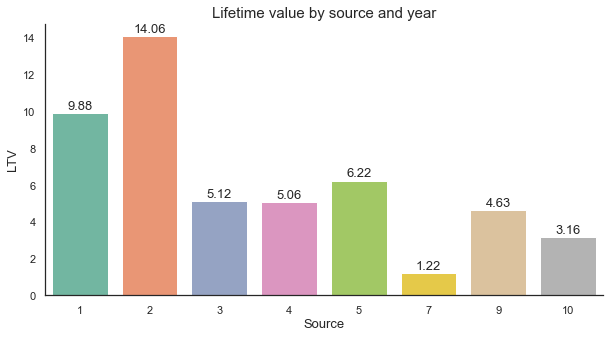

In [76]:
plt.figure(figsize=(10, 5))
bar = sns.barplot(x='source_id', y='ltv', data=economics)
sns.despine()
plt.xlabel('Source', size=13)
plt.ylabel('LTV', size=13)
plt.title('Lifetime value by source and year', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

### Conclusion Step 4

Users make a purchase on the first day, from 3 and 4 source. Many people did purchase more than one purchase per month. The average purchase size is about 5. On average, each customer brought about $2 in revenue over their lifetime and this is mostly in the first month.

## Step 5. Make reports and calculate metrics for marketing 

#### How much money was spent? Overall/per source/over time

In [77]:
print(f'In one year overall was spent {costs.costs.sum()}')

In one year overall was spent 329131.62


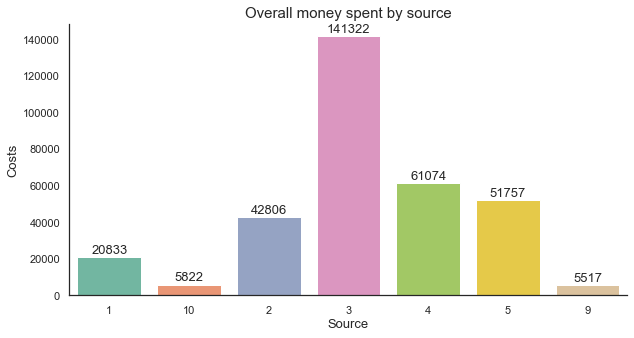

In [78]:
fig = costs.groupby('source_id').sum().reset_index()
plt.figure(figsize=(10, 5))
bar = sns.barplot(x='source_id', y='costs', data=fig)
sns.despine()
plt.xlabel('Source', size=13)
plt.ylabel('Costs', size=13)
plt.title('Overall money spent by source', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

According to the source, the most spent on 3 (141322). It is followed by 4 (61074) and 5 (51757).

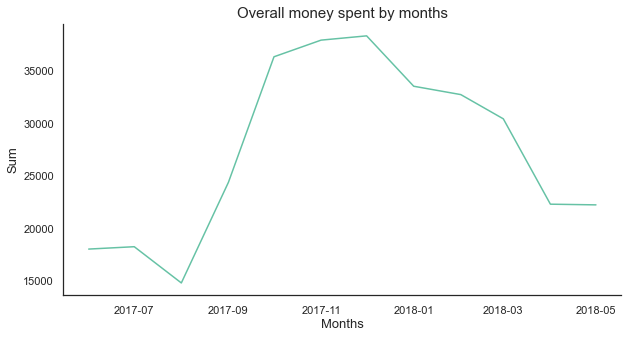

In [79]:
fig = costs.groupby('costs_month').sum().reset_index()
plt.figure(figsize=(10, 5))
bar = sns.lineplot(x='costs_month', y='costs', data=fig)
sns.despine()
plt.xlabel('Months', size=13)
plt.ylabel('Sum', size=13)
plt.title('Overall money spent by months', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

The budget increased from early September to December, and then began to decrease.

#### How much did customer acquisition from each of the sources cost?

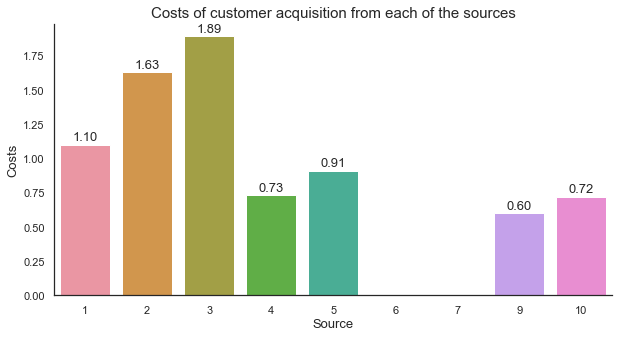

In [80]:
sum_costs = costs.groupby(['source_id']).sum()
sum_costs.index = sum_costs.index.astype(int)
group_by_source = pd.merge(visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index(),
                           sum_costs,
                           on='source_id',
                           how='left')
group_by_source['cac'] = round(group_by_source.costs / group_by_source.uid, 2)
plt.figure(figsize=(10, 5))
bar = sns.barplot(x='source_id', y='cac', data=group_by_source)
sns.despine()
plt.xlabel('Source', size=13)
plt.ylabel('Costs', size=13)
plt.title('Costs of customer acquisition from each of the sources', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

Highest marketing costs at source 3 & 2
#### How worthwhile where the investments? (ROI)

In [81]:
group_by_source = group_by_source.merge(economics[['ltv', 'source_id']], on='source_id', how='left')
group_by_source['romi'] = group_by_source.ltv / group_by_source.cac

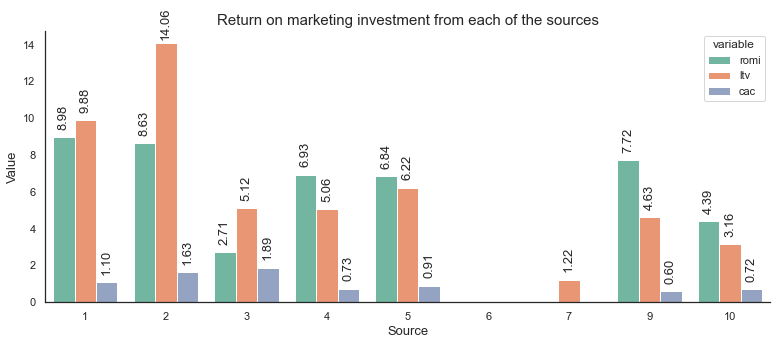

In [88]:
fig = group_by_source.melt(id_vars='source_id', value_vars=['romi', 'ltv', 'cac' ])
plt.figure(figsize=(13, 5))
bar = sns.barplot(x='source_id', y='value', hue='variable',data=fig)
sns.despine()
plt.xlabel('Source', size=13)
plt.ylabel('Value', size=13)
plt.title('Return on marketing investment from each of the sources', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 20),
                 textcoords='offset points',
                 rotation=90)

The best return on investment is from sources 1, 2 and 9.

#### Conclusion Step 5

The marketing budget affects the number of orders - the budget increases by December and the orders increase. According to sources, the most money was spent on sources 3 and 4. And they are the largest in the number of orders. But the cost of attracting customers is much higher for the 3rd source than the 4th. But despite this the best return on investment is from sources 1 and 2.

## Overall conclusion

Last year Yandex.Afisha did a great job - the number of active users and the number of orders increased. now we need to think about how to increase the average purchase size and retention of users.
You also need to remember that every year more and more users use portable devices. We need to figure out why the long sessions from portable devices are so small. Not convenient? You need to pay attention to this.

It is necessary to study the behavior of users from sources 1 and 2. Why with such a number of orders (7138 and 7305), the income from them is the highest. If users from source 4 with their number of orders (14253) behave like users 1 and 2 with revenues of 14.06 and 9.88, then source 4 will quickly overtake them.

Therefore, to maintain the level, you need to continue to pay attention to the desktop version, the 4th source with their number of orders and the 1st and 2nd sources with their income.

If you need to increase profits, you need to turn users of the 4th source with their number of orders into users of the 1st and 2nd with their more orders.